## Classificação com Machine Learning


### Projeto de Classificação de Sucesso Musical (Spotify Hits & Flops) 

Este projeto foca no desenvolvimento de **modelos de classificação** capazes de prever se uma faixa musical, com base em suas características técnicas, será um **"Hit"** (Sucesso) ou um **"Flop"** (Não-Sucesso/Não-Popular) no contexto do *mainstream*.


### Objetivo e Contexto

Utilizaremos um *dataset* exclusivo, obtido através da **Web API do Spotify**, que contém diversas *features* (características) para cada faixa, como **dançabilidade**, **energia**, **valência**, **tempo**, entre outras. Cada faixa está rotulada como **'1' (Hit)** ou **'0' (Flop)**, seguindo critérios definidos pelo autor do *dataset* para indicar sua provável popularidade.

É crucial notar que a etiqueta **'Flop'** não implica que a música seja de qualidade inferior ou um fracasso objetivo, mas sim que **provavelmente não alcançaria popularidade generalizada** no *mainstream*.



### Metodologia

Nosso trabalho consistirá em:

1.  **Análise Exploratória de Dados (EDA)** para compreender a distribuição das *features* entre as classes 'Hit' e 'Flop'.
2.  **Pré-processamento de Dados** para preparar as *features* para o treinamento do modelo.
3.  **Treinamento e Avaliação** de diferentes algoritmos de classificação (como Regressão Logística, Random Forest, SVM, etc.) para identificar qual deles oferece o melhor desempenho na distinção entre *hits* e *flops*.



### Relevância

A capacidade de prever o potencial de sucesso de uma música é de grande interesse para a **indústria musical** (gravadoras, *DJs* e artistas), auxiliando na tomada de decisões estratégicas sobre produção, marketing e *playlisting*. Este projeto visa não apenas criar um modelo preditivo robusto, mas também **identificar quais características técnicas do Spotify são os preditores mais fortes** do sucesso musical.

## **Setup**

In [1]:
#Data Wranling 
import pandas as pd 
import numpy as np 

#Data visualizatin 
import matplotlib.pyplot as plt 
import seaborn as sns 

#KFold
from sklearn.model_selection import KFold, cross_val_score 

#Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Normalization 
from sklearn.preprocessing import MinMaxScaler

#Classification 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Metric 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc 

#Remove warning 
import warnings


In [2]:
# Ignora todos os warnings
warnings.filterwarnings('ignore')



### Data

In [3]:
#Load data 
df_90 = pd.read_csv('..\Data\Raw\dataset-of-90s.csv')
df_00 = pd.read_csv('..\Data\Raw\dataset-of-00s.csv')
df_10 = pd.read_csv('..\Data\Raw\dataset-of-10s.csv')

In [4]:
#Concat datasets 
df = pd.concat([df_90,df_00,df_10])

In [5]:
#Visualizando primeiras linhas 
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [6]:
#Infos gerais 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17790 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             17790 non-null  object 
 1   artist            17790 non-null  object 
 2   uri               17790 non-null  object 
 3   danceability      17790 non-null  float64
 4   energy            17790 non-null  float64
 5   key               17790 non-null  int64  
 6   loudness          17790 non-null  float64
 7   mode              17790 non-null  int64  
 8   speechiness       17790 non-null  float64
 9   acousticness      17790 non-null  float64
 10  instrumentalness  17790 non-null  float64
 11  liveness          17790 non-null  float64
 12  valence           17790 non-null  float64
 13  tempo             17790 non-null  float64
 14  duration_ms       17790 non-null  int64  
 15  time_signature    17790 non-null  int64  
 16  chorus_hit        17790 non-null  float64
 17 

In [7]:
#Verificando nulos 
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [8]:
#Verificando dados duplicados 
df.duplicated().sum()

#Verificando linhas com dados duplicados 
df[df.duplicated()]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
30,Someday,Sugar Ray,spotify:track:6NcHJ23mLQKnVxQcOmT7JW,0.743,0.670,1,-4.547,0,0.0293,0.010800,0.070200,0.2200,0.934,110.832,243333,4,25.36994,12,1
77,L.A. Song,Beth Hart,spotify:track:69pBTbnLue0leYUCMAFqPj,0.351,0.615,7,-7.621,1,0.0451,0.206000,0.000000,0.9850,0.337,127.798,271107,3,58.57055,10,1
188,Steam,Ty Herndon,spotify:track:2sPXJCnKyQ1SWjc2JdFnQK,0.676,0.738,6,-6.693,1,0.0262,0.049700,0.000003,0.0784,0.697,101.944,216693,4,21.42116,12,1
206,Sexual (Li Da Di),Amber,spotify:track:4jCWcK6PhbnzOCAFJEztUm,0.623,0.898,4,-6.604,0,0.0309,0.000192,0.303000,0.1380,0.786,130.993,226227,4,30.76970,12,1
220,I Need To Know,Marc Anthony,spotify:track:7ffwRz8lZyDOE4Vj58Lo72,0.813,0.949,3,-2.563,0,0.0336,0.486000,0.000010,0.1120,0.792,115.061,227707,4,31.46063,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,Fearless,Taylor Swift,spotify:track:6Eu31gddWw0gOGO506pJYA,0.594,0.712,5,-4.418,1,0.0273,0.040000,0.000000,0.3090,0.476,99.972,241987,4,20.97568,12,1
5929,I Wanna Make You Close Your Eyes,Dierks Bentley,spotify:track:0V6Na986SNXm1CpreVF56E,0.599,0.610,1,-5.745,1,0.0232,0.104000,0.000048,0.1150,0.359,95.979,239119,4,33.35001,10,1
6081,Life After You,Daughtry,spotify:track:70NGpcNvhI2hqonWNAETIu,0.396,0.796,5,-3.253,1,0.0357,0.059700,0.000000,0.4070,0.362,154.037,207213,3,63.75813,9,1
6112,Live Like We're Dying,Kris Allen,spotify:track:1HfxPaJggVwFsvOtHbVzMz,0.589,0.893,0,-2.948,1,0.0397,0.027300,0.000000,0.3430,0.940,92.011,212507,4,35.05636,10,1


In [9]:
#Top 5 hits 
df.groupby(['artist','track']).size().sort_values(ascending = False).head(5)

artist              track                             
Julee Cruise        Falling                               12
Stefano Patarnello  Chebika - Claudio Mate Metal Remix     8
Todd Terry          Feeling Punk - Asle Remix              6
Arvo Pärt           Spiegel im Spiegel                     5
Story Of The Year   Until the Day I Die                    5
dtype: int64

In [10]:
#Removendo duplicatas 
df = df.drop_duplicates(subset=['track','artist'])

In [11]:
#Dimensão dos dados 
df.shape

(17362, 19)

In [12]:
#Proporção target
df['target'].value_counts(normalize = True) * 100

target
1    50.224628
0    49.775372
Name: proportion, dtype: float64

### Features

In [13]:
#Tipos de dados 
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [14]:
#Infos descritivas 
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,1.736200e+04,17362.000000,17362.000000,17362.000000,17362.000000
mean,0.559860,0.655534,5.269036,-8.368586,0.652632,0.088807,0.240249,0.157978,0.196683,0.485989,121.053226,2.494776e+05,3.923050,40.964088,10.795473,0.502246
std,0.187469,0.246079,3.563331,5.302304,0.476148,0.092832,0.307832,0.308222,0.167195,0.255124,29.909889,1.119149e+05,0.378197,19.964160,4.744401,0.500009
min,0.057600,0.000251,0.000000,-49.253000,0.000000,0.022000,0.000000,0.000000,0.013000,0.000000,34.535000,1.592000e+04,0.000000,0.000000,1.000000,0.000000
25%,0.438000,0.505000,2.000000,-9.919000,0.000000,0.035700,0.009080,0.000000,0.093800,0.278250,97.149000,1.997632e+05,4.000000,27.902563,8.000000,0.000000
50%,0.577000,0.699000,5.000000,-6.913500,1.000000,0.050400,0.082700,0.000044,0.128000,0.487000,119.876000,2.331265e+05,4.000000,36.271890,10.000000,1.000000
75%,0.697000,0.856000,8.000000,-5.036000,1.000000,0.096700,0.378750,0.058800,0.257000,0.690000,140.003000,2.763132e+05,4.000000,48.324433,12.000000,1.000000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.956000,0.996000,0.998000,0.992000,0.996000,217.872000,4.170227e+06,5.000000,262.615400,169.000000,1.000000


In [15]:
#Correlação
num_cols = df.select_dtypes(include='number')
corr = num_cols.corr()

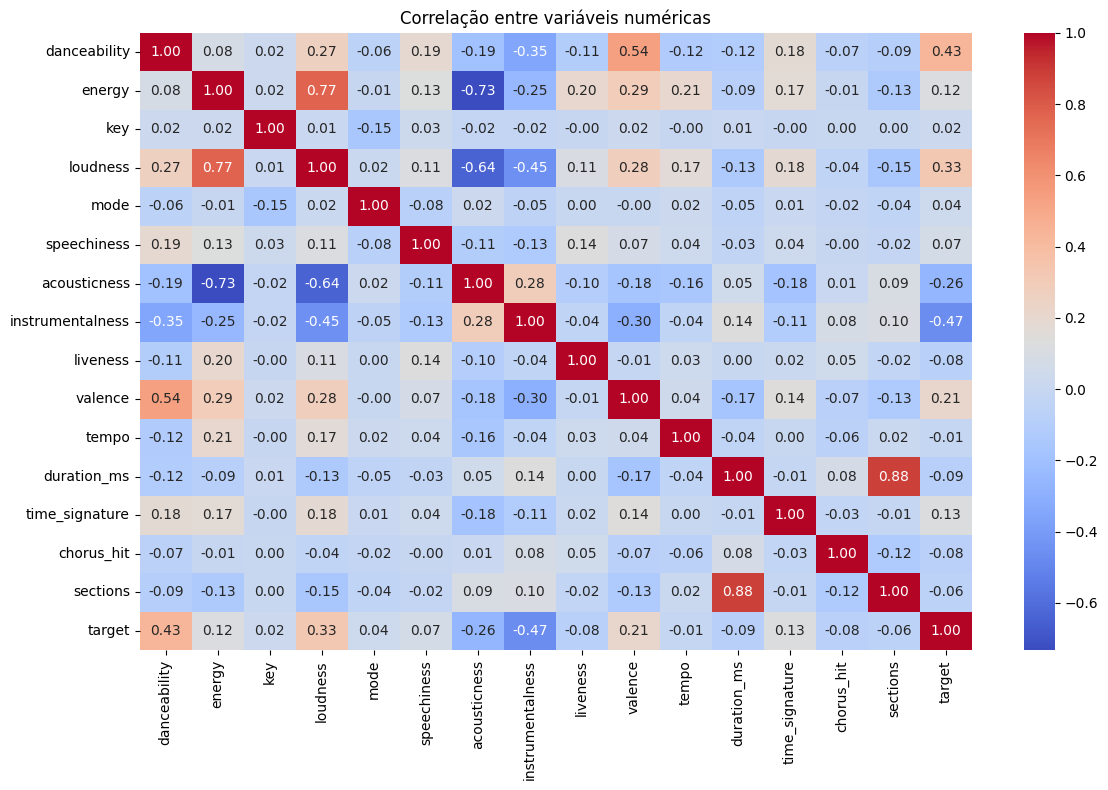

In [16]:
#Heatmap
fig = plt.figure(figsize=([12,8]))
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm', fmt = '.2f')

#Título e eixos 
plt.title('Correlação entre variáveis numéricas')
plt.tight_layout()
plt.show()

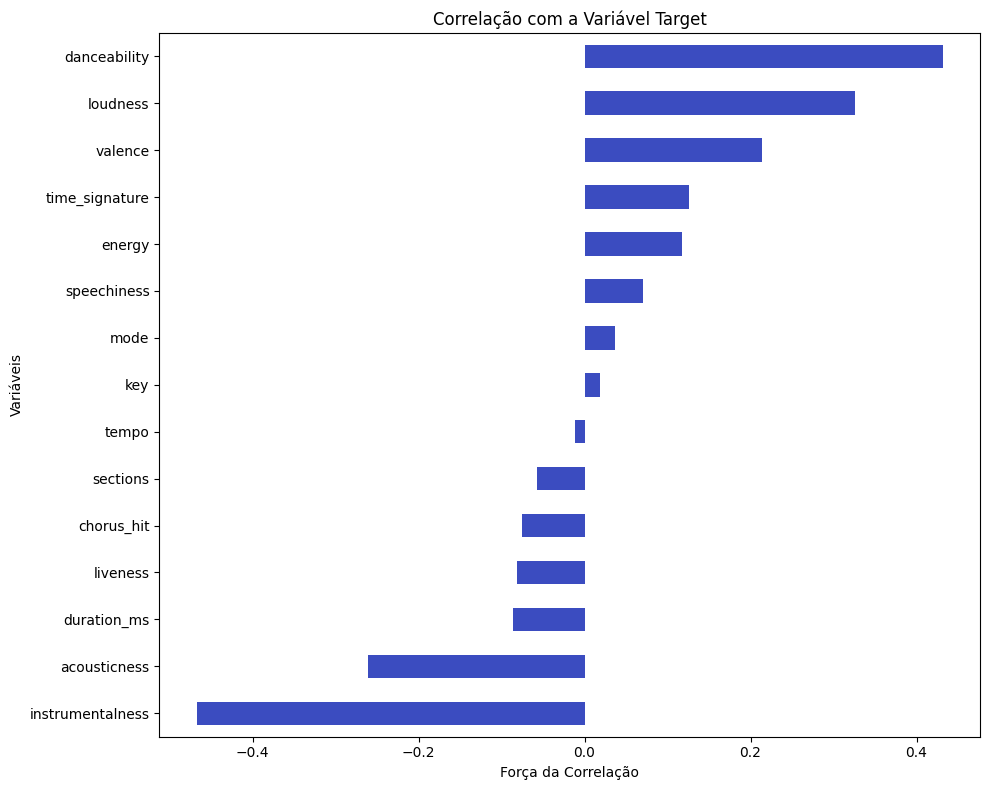

In [17]:
#Selecionando apenas coluna e remove a correlação com a mesma
target_corr = corr['target'].drop('target').sort_values()

#Gráfico de barras horizontal
plt.figure(figsize=(10, 8))
target_corr.plot(kind='barh', cmap='coolwarm') 

#Título e eixos
plt.title('Correlação com a Variável Target')
plt.xlabel('Força da Correlação')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

#### Análise correlaçao 

O gráfico de barras mostra perfeitamente as "alavancas" que aumentam ou diminuem a chance de uma música ser um hit (target):

- Pior correlação: instrumentalness (-0.47)

Insight: Este é o fator mais negativo, de longe. O gráfico de barras deixa claro que o público do Spotify neste dataset não classifica músicas instrumentais (sem voz) como hits. A presença de vocais é essencial.

- Melhor correlação: **danceability (0.43)**

Insight: O fator positivo mais forte. **Músicas feitas para dançar têm uma probabilidade muito maior de serem hits.**

- Outra correlaçõe forte: **loudness (0.32)**

Insight: **Músicas com volume percebido mais alto (masterização "quente") performam significativamente melhor**. Isso está alinhado com músicas pop modernas, que são comprimidas para soarem altas e impactantes.

- Outra correlação ruim acousticness (-0.26)

Insight: Músicas acústicas (violão, piano, voz pura) têm uma tendência negativa. Hits tendem a ser mais produzidos e eletrônicos.

**Conclusão**:

Músicas de hit são altas e energéticas. Para um modelo de Machine Learning, isso é um sinal de multicolinearidade. O gráfico de barras nos ajuda a decidir: como loudness tem uma correlação mais forte com o target, ela é a variável preditora melhor das duas.



### Separação dos dados 

In [18]:
X = df.drop(['track','artist','uri','target'], axis = 1 )
y = df['target']

In [19]:
#Treinando o modelo 
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

#Dimensão de treino e teste 
print(f'Treino:', X_train.shape)
print(f'Teste:', X_test.shape)

Treino: (13889, 15)
Teste: (3473, 15)


### Normalização

In [20]:
#MinMaxScaler 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Transformando novamente em df
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Modelagem

#### Regressão Logística

In [21]:
from sklearn.linear_model import LogisticRegression

#Aplicando o modelo de Regressão Logística
model = LogisticRegression(random_state= 42)
model.fit(X_train,y_train)

#Predição do modelo 
y_pred = model.predict(X_test)

#Métricas de avaliação do modelo 
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Acurácia: 0.79
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1719
           1       0.75      0.88      0.81      1754

    accuracy                           0.79      3473
   macro avg       0.80      0.79      0.79      3473
weighted avg       0.80      0.79      0.79      3473



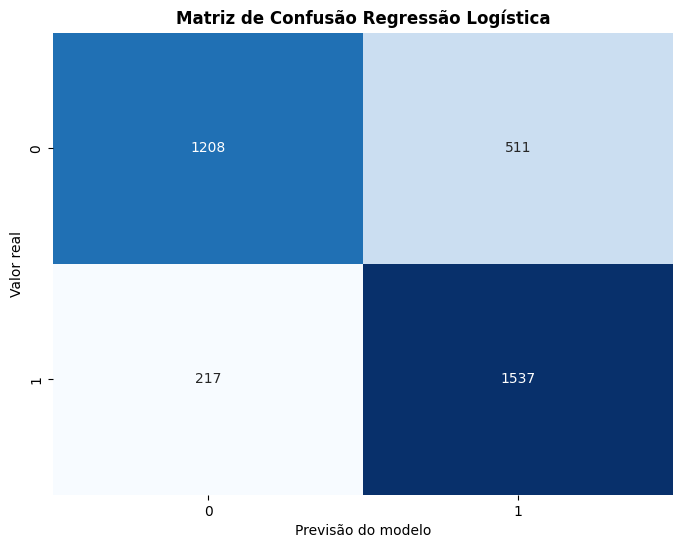

In [22]:
#Matriz confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão Regressão Logística', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()


O modelo de Regressão Logística apresentou um bom desempenho geral, com uma acurácia de **79%** (2745 acertos de 3473 previsões).

* **Principal Força (Alto Recall):** O modelo é excelente em identificar os "Hits" (Classe 1). Ele encontrou corretamente **1537** hits e deixou de identificar apenas 217 (Falsos Negativos). Isso representa um Recall de 87,6% para a classe 1.
* **Principal Fraqueza (Baixa Precisão):** A fraqueza do modelo está no número elevado de Falsos Positivos. Ele classificou incorretamente **511** músicas como "Hits" quando, na verdade, não eram (Classe 0).

**Conclusão:** O modelo é "otimista" e ótimo para **não perder hits de vista**, mas seu custo é gerar muitos "alarmes falsos" (classificar músicas comuns como hits).

#### K-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
#KNN model
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

#Predição do moelo
y_pred = knn_model.predict(X_test)

#Métricas de avaliação do modelo 
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Acurácia: 0.78
              precision    recall  f1-score   support

           0       0.83      0.69      0.76      1719
           1       0.74      0.86      0.80      1754

    accuracy                           0.78      3473
   macro avg       0.79      0.78      0.78      3473
weighted avg       0.79      0.78      0.78      3473



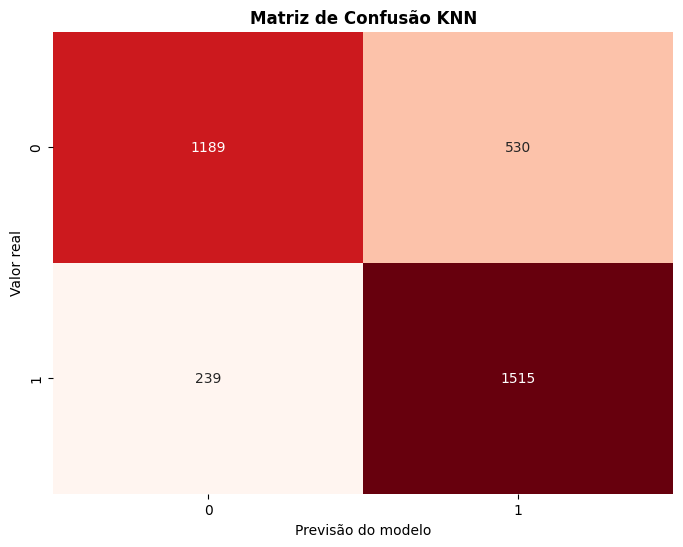

In [24]:
#Matriz confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão KNN', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()


O modelo KNN apresentou uma performance geral razoável, com uma acurácia de **78%** (2704 acertos de 3473 previsões).

* **Principal Força (Alto Recall):** O modelo é muito eficaz em encontrar os "Hits" (Classe 1). Ele identificou corretamente **1515** hits e deixou de identificar apenas 239 (Falsos Negativos), resultando em um Recall de 86,4% para a classe 1.
* **Principal Fraqueza (Baixa Precisão):** A fraqueza do modelo está no número elevado de Falsos Positivos. Ele classificou incorretamente **530** músicas como "Hits" quando, na verdade, não eram (Classe 0).

**Conclusão:** O KNN se mostra um modelo "otimista", muito bom para **encontrar a maioria dos hits**, mas seu custo é gerar um volume considerável de "alarmes falsos" (classificar músicas comuns como hits).

#### Árvore de Decisão

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth= 5)
model.fit(X_train, y_train)

#Predição do modelo 
y_pred = model.predict(X_test)

#Métricas de avaliação do modelo 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1719
           1       0.78      0.86      0.82      1754

    accuracy                           0.81      3473
   macro avg       0.81      0.81      0.81      3473
weighted avg       0.81      0.81      0.81      3473



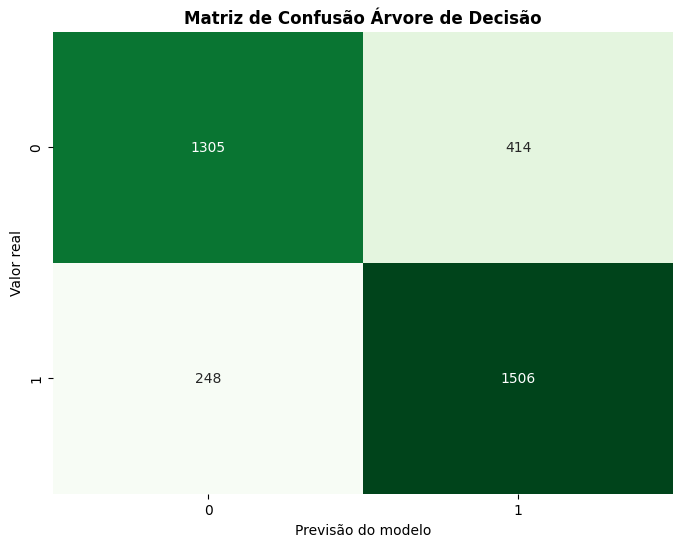

In [26]:
#Matriz de confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão Árvore de Decisão', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()


O modelo de Árvore de Decisão apresentou o desempenho mais equilibrado até agora, com uma acurácia total de **81%** (2811 acertos de 3473 previsões).

* **Principal Força (Alto Recall):** Assim como os outros modelos, ele é muito bom em identificar "Hits" (Classe 1). Ele encontrou corretamente **1506** hits e deixou de identificar 248 (Falsos Negativos), resultando em um Recall de 85,9%.
* **Ponto de Atenção (Falsos Positivos):** O modelo ainda gera um número considerável de Falsos Positivos (**414**), classificando músicas comuns como hits. No entanto, este número é visivelmente **menor** que o da Regressão Logística (511) e o do KNN (530).

**Conclusão:** A Árvore de Decisão se mostra um modelo mais balanceado. Ele mantém a excelente capacidade de **encontrar hits**, mas com uma **redução nos "alarmes falsos"**, o que resulta em uma precisão e acurácia geral superiores aos modelos anteriores.

#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
#Definindo o modelo
model = RandomForestClassifier(n_estimators= 200, random_state= 42)
model.fit(X_train,y_train)

#Predição
y_pred = model.predict(X_test)

#Métricas de avaliação do modelo
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1719
           1       0.81      0.88      0.84      1754

    accuracy                           0.83      3473
   macro avg       0.84      0.83      0.83      3473
weighted avg       0.84      0.83      0.83      3473



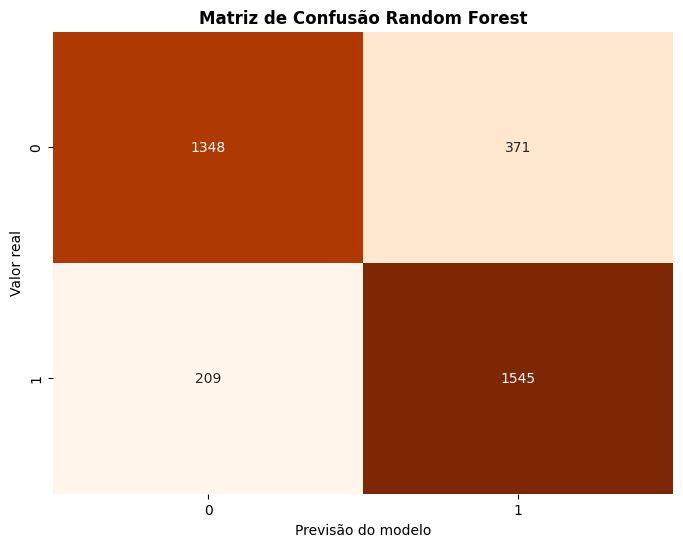

In [28]:
#Matriz de confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão Random Forest', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()

#### Gradient Bosting 

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

#Definfindo o modelo
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

#Métricas de avaliação
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1719
           1       0.79      0.89      0.84      1754

    accuracy                           0.83      3473
   macro avg       0.83      0.83      0.83      3473
weighted avg       0.83      0.83      0.83      3473



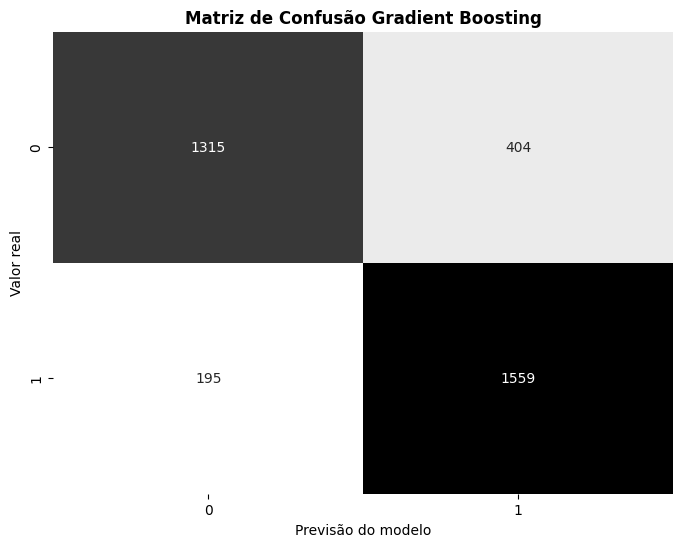

In [30]:
#Matriz de confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão Gradient Boosting', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()